### Imports et initialisations

In [17]:
import numpy as np
import os
import tensorflow as tf
import tensorflow.keras as keras
import random
import re
from nltk.corpus import stopwords
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import clustertools
from clustertools import *
#import torch

In [37]:
#répertoire dans lequel seront stockés les clusters, doit se terminer obligatoirement par /
cluster_dir = "clusters/Africain_Min_ST/"
raw_dataset_file = "datasets/haine2022_oversampling_africain.txt"

##### Récupération des tweets

In [38]:
with open(raw_dataset_file, "r") as file:
    raw_dataset = file.read().splitlines()
    

In [50]:
clean_dataset = [m.split() for m in raw_dataset]

### Encodage à l'aide d'un transformer pré entraîné

On charge le modèle depuis le disque

In [5]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer("models/model_multilangue")

In [39]:
%%time
encoded_dataset = model.encode(raw_dataset)

CPU times: user 19.8 s, sys: 88.3 ms, total: 19.9 s
Wall time: 18.8 s


### Visualisation du dataset

- On réalise une réduction de dimension afin de visualiser les données dans une grille en deux dimensions
- On utilise pour cela la méthode PCA

In [40]:
%%time

pca = PCA(n_components=2)

#On crée une version en deux dimensions de notre jeu de données
two_dim_dataset = pca.fit_transform(encoded_dataset)

CPU times: user 592 ms, sys: 943 ms, total: 1.54 s
Wall time: 234 ms


In [41]:
#On utilise la matrice transposée de notre jeu de données pour pouvoir visualiser les données
b = two_dim_dataset.T

#Taille des figures
plt.rcParams["figure.figsize"] = (10,10)
plt.rcParams["lines.markersize"] = 3

In [51]:
init_globals(clean_dataset, raw_dataset, two_dim_dataset, cluster_dir)

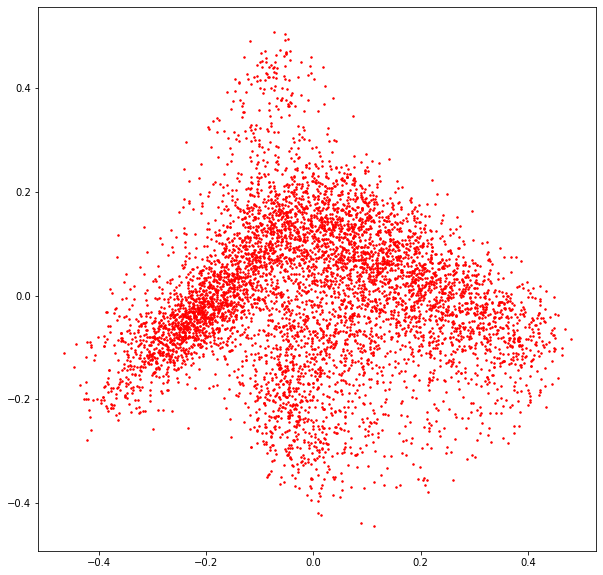

In [43]:
#Affichage des données
plt.plot(b[0], b[1], 'r.')
plt.show()

### Kmeans

In [44]:
n_clust = 10

In [45]:
%%time
km_model = KMeans(n_clusters=n_clust, random_state=0)
kmeans = km_model.fit(encoded_dataset)

CPU times: user 17.2 s, sys: 5.58 s, total: 22.8 s
Wall time: 2.99 s


In [46]:
km_pred = kmeans.predict(encoded_dataset)

In [53]:
res, wlists, mlists, cmlists, e2dmlists, mfw, hkw, clust_n_msg = parse(km_pred)

Cluster 0 : 802 messages
394 messages contiennent un mot-clé haineux (soit 49.13%)
Les 20 mots les plus fréquents : babouin bamboula va negresse te elle Il Tu Le plus toi ta se ! La cul sa » faire fait 


Cluster 1 : 857 messages
418 messages contiennent un mot-clé haineux (soit 48.77%)
Les 20 mots les plus fréquents : maison Le toi » va plus dire ! Il Sale Je te Un ta se Tu dit c quand bien 


Cluster 2 : 389 messages
137 messages contiennent un mot-clé haineux (soit 35.22%)
Les 20 mots les plus fréquents : : Nègre Le » Joseph service par roman - "Le Les titre Conrad Narcisse son rebaptisé ! mot Narcisse" se 


Cluster 3 : 808 messages
416 messages contiennent un mot-clé haineux (soit 51.49%)
Les 20 mots les plus fréquents : raciste mot » dire sont même par blanc racisme plus si fait dit se te noirs tout suis race me 


Cluster 4 : 473 messages
417 messages contiennent un mot-clé haineux (soit 88.16%)
Les 20 mots les plus fréquents : macaque Macaque Le Je ta te sa se singe faire ! Tu 

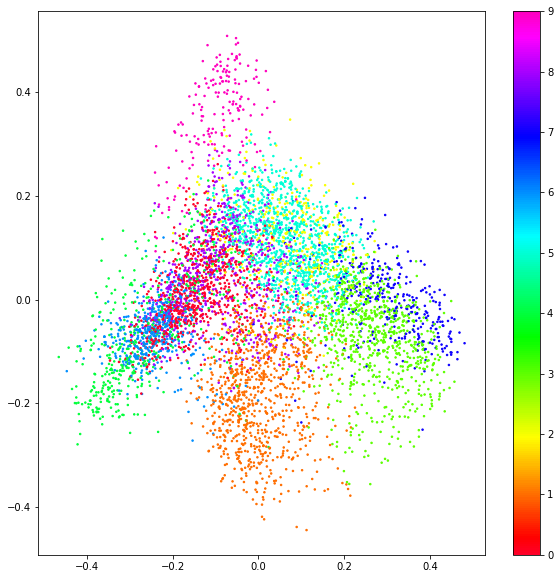

In [62]:
print_clusters_info(clust_n_msg, mfw, hkw, [])
plot_results(km_pred, two_dim_dataset)

In [58]:
mlists[4][:20]

["Ta mis un singe parce que c 'est un noir? Sale raciste",
 "ㅤㅤㅤ ⠀⠀₊· ͟͟͞͞➳⠀Ma—macaque ? C'est quoi un macaque ?",
 'macaque',
 'Pourrais-tu arrêter de me mentionné petit macaque',
 'Le seul macaque ici c’est moi',
 'nshhh bande de macaque 😒🥲',
 'le culot gros macaque',
 'Une tête à m’appeler macaque dans la rue',
 'C’est toi tu pu macaque',
 'Tu parles trop macaque',
 "Continu à vomir macaque, je m'en bas les couilles je suis athée bouffons de muz 🤣🤣🤣🤣🤣",
 "Mes amies, voila ce qu'on appelle aussi un ver macaque, avec qui j'ai eu le deplaisir de cohabiter quelques temps. J'en garde des sequelles car mon crane est légèrement enfoncé là où la bestiole s'est installée...",
 'Macaque',
 'Toi, ta logorrhée, je vais te la faire ra-avaler … macaque !',
 'Non macrapaud, mélange entre macaque et crapaud',
 'tu es un beau macaque.',
 'Pourquoi un babouin, quoi que... Avec tous les macaques du gouvernement...🤪😜',
 'je préfère banania',
 '(macaque) aime ça',
 'Dit le macaque albinos']

In [64]:
method = "km_10"
save_clusters_msg(cmlists, mlists, e2dmlists, method)
save_clusters_info(clust_n_msg, mfw, hkw, method)#, centers=[])

### SOM

In [65]:
from sklearn_som.som import SOM

In [66]:
som_normalized_dataset = np.array([vect / np.linalg.norm(vect) if np.linalg.norm(vect) != 0 else vect for vect in encoded_dataset])

In [67]:
%%time

som = SOM(m=3, n=3, dim=512)
som.fit(som_normalized_dataset)

CPU times: user 1.67 s, sys: 4.68 ms, total: 1.68 s
Wall time: 1.68 s


In [68]:
%%time

som_pred = som.predict(som_normalized_dataset)

CPU times: user 232 ms, sys: 0 ns, total: 232 ms
Wall time: 229 ms


Cluster 0 : 876 messages
508 messages contiennent un mot-clé haineux (soit 57.99%)
Les 20 mots les plus fréquents : raciste arabe racisme sont service par » même dire dit si blanc plus se fait mot quand maison bien tout 


Cluster 1 : 664 messages
361 messages contiennent un mot-clé haineux (soit 54.37%)
Les 20 mots les plus fréquents : se fait par plus sont nous ! te tout même service si faire Je maison dire son me sa bien 


Cluster 2 : 842 messages
475 messages contiennent un mot-clé haineux (soit 56.41%)
Les 20 mots les plus fréquents : me plus faire se fait bien babouin même te tout Je ta si suis ! macaque nous sont mon ma 


Cluster 3 : 537 messages
241 messages contiennent un mot-clé haineux (soit 44.88%)
Les 20 mots les plus fréquents : mot » dire plus fait Le même quand dit va si se par blanc veut Je Et sa juste c 


Cluster 4 : 537 messages
192 messages contiennent un mot-clé haineux (soit 35.75%)
Les 20 mots les plus fréquents : service + Le : Nègre » Joseph par ! plus son L

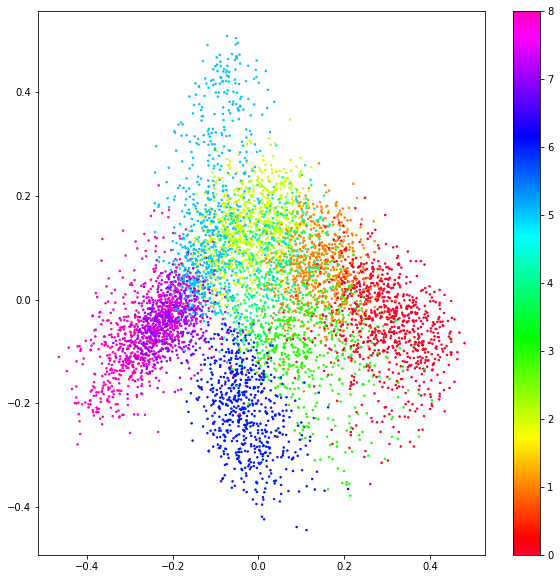

In [70]:
parse_no_save(som_pred, #"som", som_centers)
              [])